Add parent directory to sys.path

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

Import simulator and utilities

In [2]:
from simulator.fdtd import FDTD2D
from simulator.utilities import print_setup_info
from simulator.detectors import PointDetector
from simulator.sources import PointSource, LineSource

from simulator.geometries import Rectangle, Circle

from simulator.viz import viz2D,viz_detector

### Simulation parameters

#### Geometry parameters

In [3]:
eps = 12          # dielectric constant of waveguide
w = 1.2e-6           # width of waveguide
r = 0.36e-6          # radius of holes
d = 1.4e-6           # defect spacing (ordinary spacing = 1)
N = 3             # number of holes on either side of defect

In [4]:
print('nx',16e-6/50e-9)
print('ny',8e-6/50e-9)
print('w',w/50e-9)
print('r',0.36e-6/50e-9) 
print('d',d/50e-9)
print('ordinary spacing',1e-6/50e-9)

nx 320.0
ny 160.0
w 24.0
r 7.2
d 28.0
ordinary spacing 20.0


In [5]:
params = {
    'backend': 'pytorch',
    'precision': 'float32',
    'nx': 640,
    'ny': 160,
    'time_steps': 50000,
    'dx': 50e-9,
    'dy': 50e-9,
    'polarization': 'TE',
    'use_pml': True,
    'pml_thickness': 20,
}

### Testing initializations

In [6]:
sim = FDTD2D(params = params)

Reading configuration from dictionary...


c:\Users\mazzo\miniconda3\lib\site-packages\torch\cuda\__init__.py:651: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


### Set geometry

In [7]:
rectangle1 = Rectangle(x1=0, y1=50, x2=sim.nx, y2=74, epsr=eps, sigma=0)
sim.add_geometry(rectangle1)

In [8]:
rectangle2 = Rectangle(x1=0, y1=108, x2=200, y2=132, epsr=eps, sigma=0)
sim.add_geometry(rectangle2)

In [9]:
rectangle3 = Rectangle(x1=440, y1=108, x2=sim.nx, y2=132, epsr=eps, sigma=0)
sim.add_geometry(rectangle3)

In [10]:
for i in range(0, N):
    circle = Circle(center_x=80+i*20, center_y=120, radius=7.2, epsr=1, sigma=0)
    sim.add_geometry(circle)

for i in range(0, N):
    circle = Circle(center_x=148+i*20, center_y=120, radius=7.2, epsr=1, sigma=0)
    sim.add_geometry(circle)

In [11]:
for i in range(0, N):
    circle = Circle(center_x=560-i*20, center_y=120, radius=7.2, epsr=1, sigma=0)
    sim.add_geometry(circle)

for i in range(0, N):
    circle = Circle(center_x=492-i*20, center_y=120, radius=7.2, epsr=1, sigma=0)
    sim.add_geometry(circle)

In [12]:
sim.update_geometry()

c:\Users\mazzo\miniconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Show material distribution

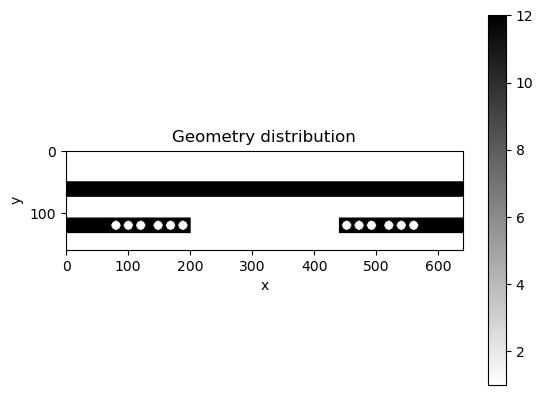

In [13]:
# Visualize permittivity distribution
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(np.transpose(sim.eps_r[:,:]), cmap='binary')
plt.title('Geometry distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

### Set sources

In [14]:
# Conversion from meep to real units
import numpy as np
f_meep  = 0.235 # frequency in meep
c = 2.99e8 # speed of light
a = 1e-6 # Characteristic lenght of the structure
f_real = f_meep * c /a # frequency in real units

print(np.format_float_scientific((f_real), unique=False, precision=2))
#print('speed of light in material',c / np.sqrt(12))

7.03e+13


### Point source

In [15]:
source_params_gaussian1 = {
    'source_type': 'point_source',  # Add 'source_type' key
    'function': 'gaussian_pulse',
    'source_x': 162,
    'source_y': 123,
    'amplitude': 1.0,
    't0': 0, # t0 is expressed in unit of time not time steps
    'frequency_center': 0.5e14,
    'frequency_width': 0.15e14
}

source_params_gaussian2 = {
    'source_type': 'point_source',  # Add 'source_type' key
    'function': 'gaussian_pulse',
    'source_x': 505,
    'source_y': 123,
    'amplitude': 1.0,
    't0': 0, # t0 is expressed in unit of time not time steps
    'frequency_center': 0.5e14,
    'frequency_width': 0.15e14
}

# source_params_sinusoidal = {
#     'source_type': 'point_source',  # Add 'source_type' key
#     'function': 'sinusoidal',
#     'source_x': 50,
#     'source_y': 82,
#     'frequency': 0.5e14
# }

gaussian_source1 = PointSource(source_params_gaussian1)
gaussian_source2 = PointSource(source_params_gaussian2)
#sinusoidal_source = PointSource(source_params_sinusoidal)

### Line source

In [22]:
source_params_gaussian = {
    'source_type': 'line_source',  # Add 'source_type' key
    'function': 'gaussian_pulse',
    'x': 40,
    'y1': 70,
    'y2': 90, 
    'amplitude': 1.0,
    't0': 0, # t0 is expressed in unit of time not time steps
    'frequency_center': 0.7e14,
    'frequency_width': 0.1e14
}

source_params_sinusoidal = {
    'source_type': 'line_source',  # Add 'source_type' key
    'function': 'sinusoidal',
    'x': 40,
    'y1': 70,
    'y2': 90,
    'frequency': 0.5e14
}

gaussian_source = LineSource(source_params_gaussian)
#sinusoidal_source = LineSource(source_params_gaussian)


In [16]:
sim.add_source(gaussian_source1)
sim.add_source(gaussian_source2)

### Add a detectors

In [17]:
detector_params = {
    'name': 'detector1',
    'position': (320, 63),
}

point_detector1 = PointDetector(detector_params)
sim.add_detector(point_detector1)

detector_params = {
    'name': 'detector2',
    'position': (138, 122),
}
point_detector2 = PointDetector(detector_params)
sim.add_detector(point_detector2)

detector_params = {
    'name': 'detector3',
    'position': (503, 122),
}
point_detector3 = PointDetector(detector_params)
sim.add_detector(point_detector3)

detector_params = {
    'name': 'detector4',
    'position': (60, 120),
}
point_detector4 = PointDetector(detector_params)
sim.add_detector(point_detector4)

detector_params = {
    'name': 'detector5',
    'position': (580, 120),
}
point_detector5 = PointDetector(detector_params)
sim.add_detector(point_detector5)

### Print simulation info

In [18]:
print_setup_info(sim)

Simulation setup information:
nx: 640
ny: 160
time_steps: 50000
dx: 5e-08
dy: 5e-08
dt: 1.179327168374842e-16
use_pml: True
pml_thickness: 20
c: 299792458
epsilon_0: 8.85418782e-12
mu_0: 1.25663706e-06
Source 0: source_type: point_source, function: gaussian_pulse, source_x: 162, source_y: 123, amplitude: 1.0, t0: 0, frequency center: 50000000000000.0, frequency width: 15000000000000.0
Source 1: source_type: point_source, function: gaussian_pulse, source_x: 505, source_y: 123, amplitude: 1.0, t0: 0, frequency center: 50000000000000.0, frequency width: 15000000000000.0
Detector 0: Detector: detector1, Position: (320, 63)
Detector 1: Detector: detector2, Position: (138, 122)
Detector 2: Detector: detector3, Position: (503, 122)
Detector 3: Detector: detector4, Position: (60, 120)
Detector 4: Detector: detector5, Position: (580, 120)


### Simulate

In [19]:
sim.run()

100%|██████████| 50000/50000 [02:02<00:00, 407.46it/s]


### Visualize fields

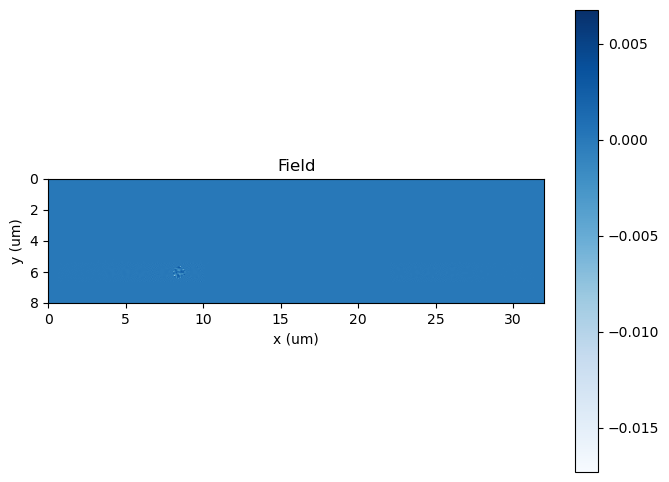

In [20]:

# plot the Ez field with cmap jet
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.transpose(sim.h_field[:,:,2]), cmap='Blues', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0])
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Field')

# plot the geometry mask with cmap binary
#ax.imshow(np.transpose(sim.eps_r), cmap='binary', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0],alpha=0.3)

fig.colorbar(im)
plt.show()

### Visualize detector

ValueError: x and y must have same first dimension, but have shapes (40000,) and (50000,)

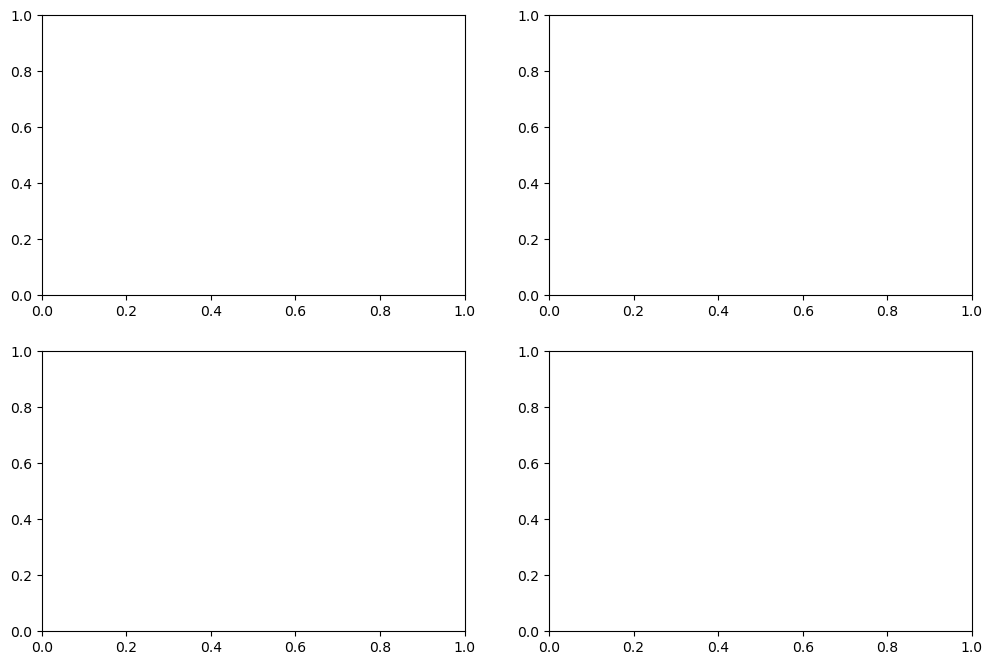

In [21]:
viz_detector(sim,point_detector1)

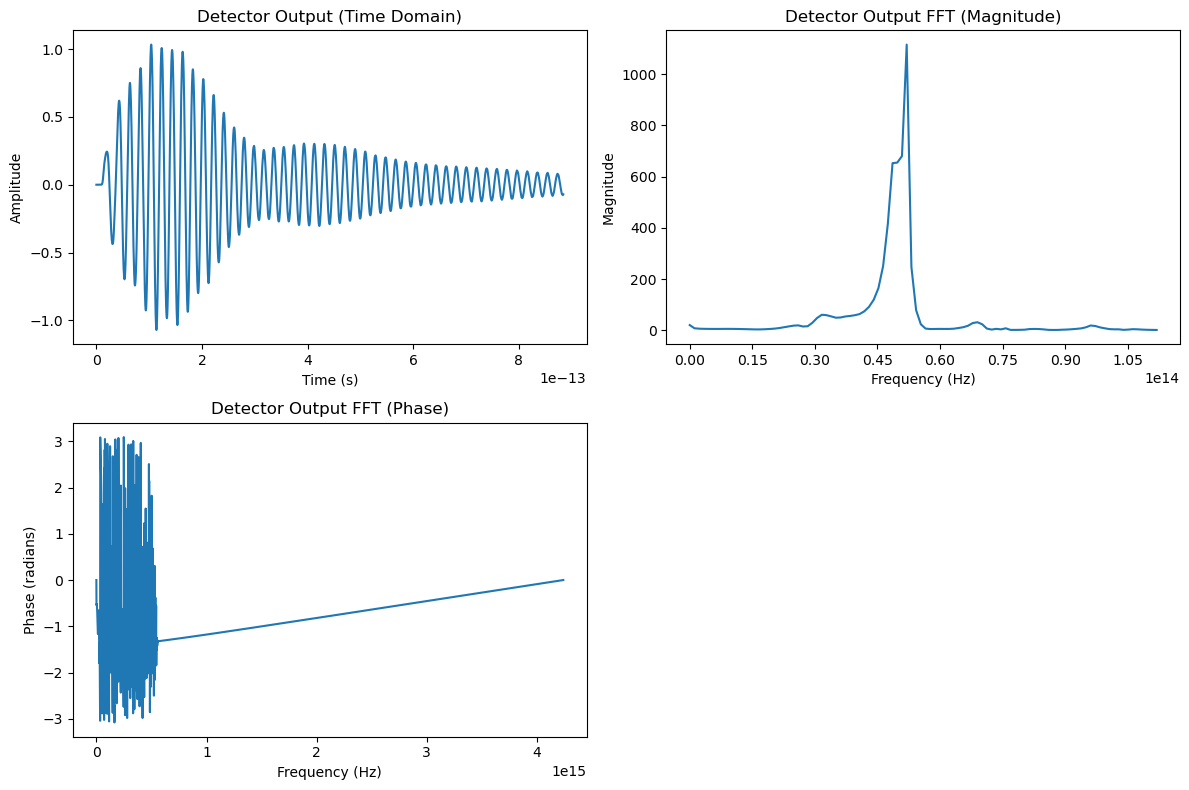

In [147]:
viz_detector(sim,point_detector2)

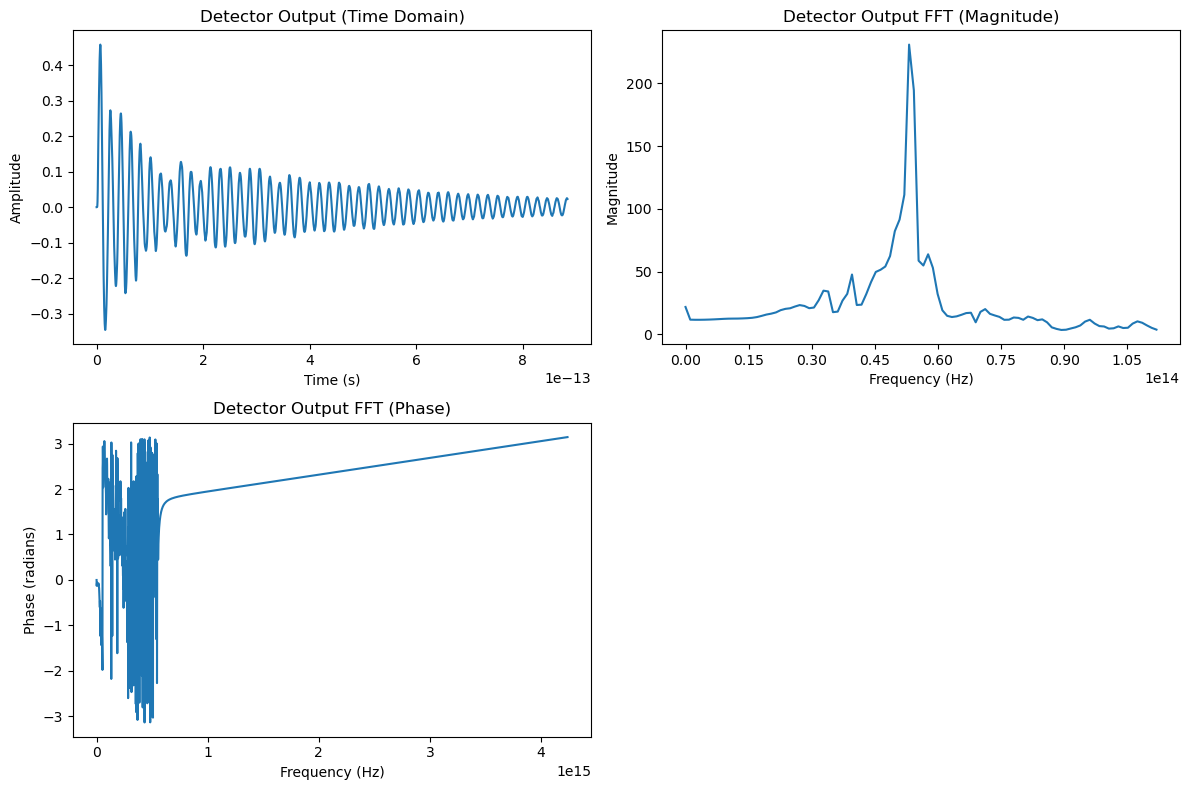

In [148]:
viz_detector(sim,point_detector3)

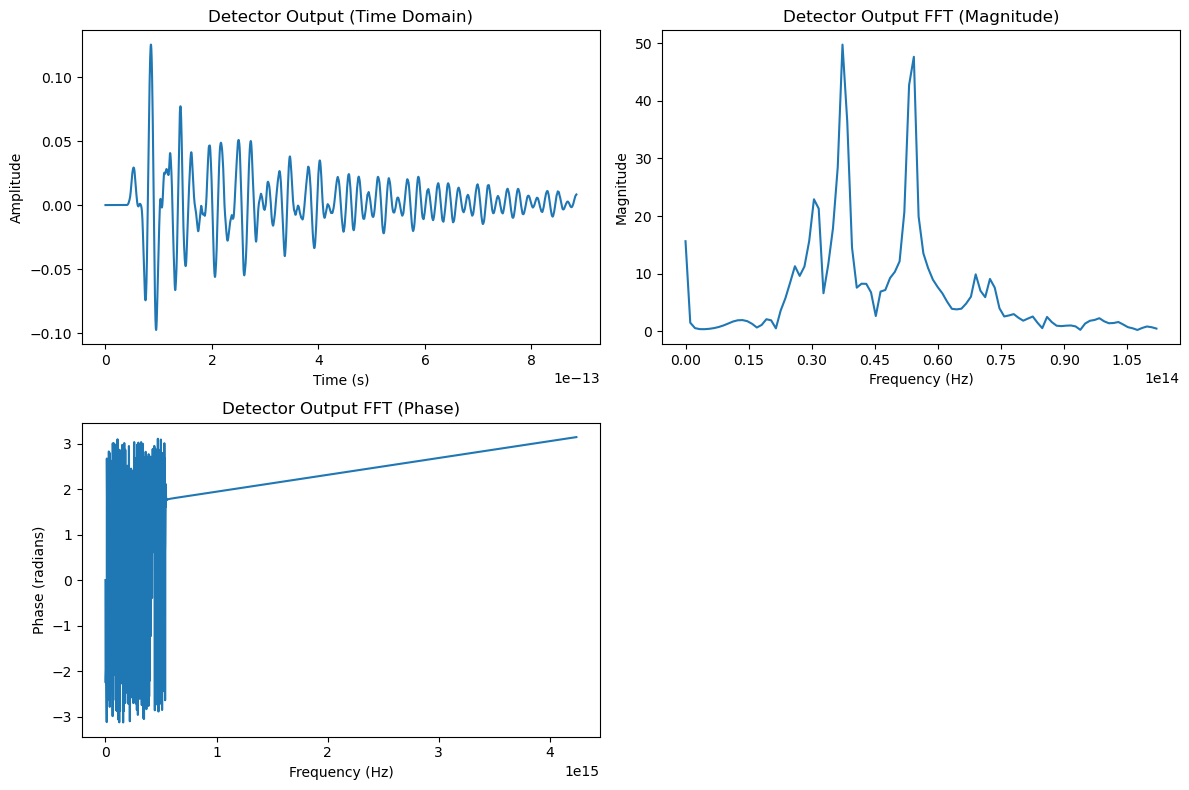

In [58]:
viz_detector(sim,point_detector4)

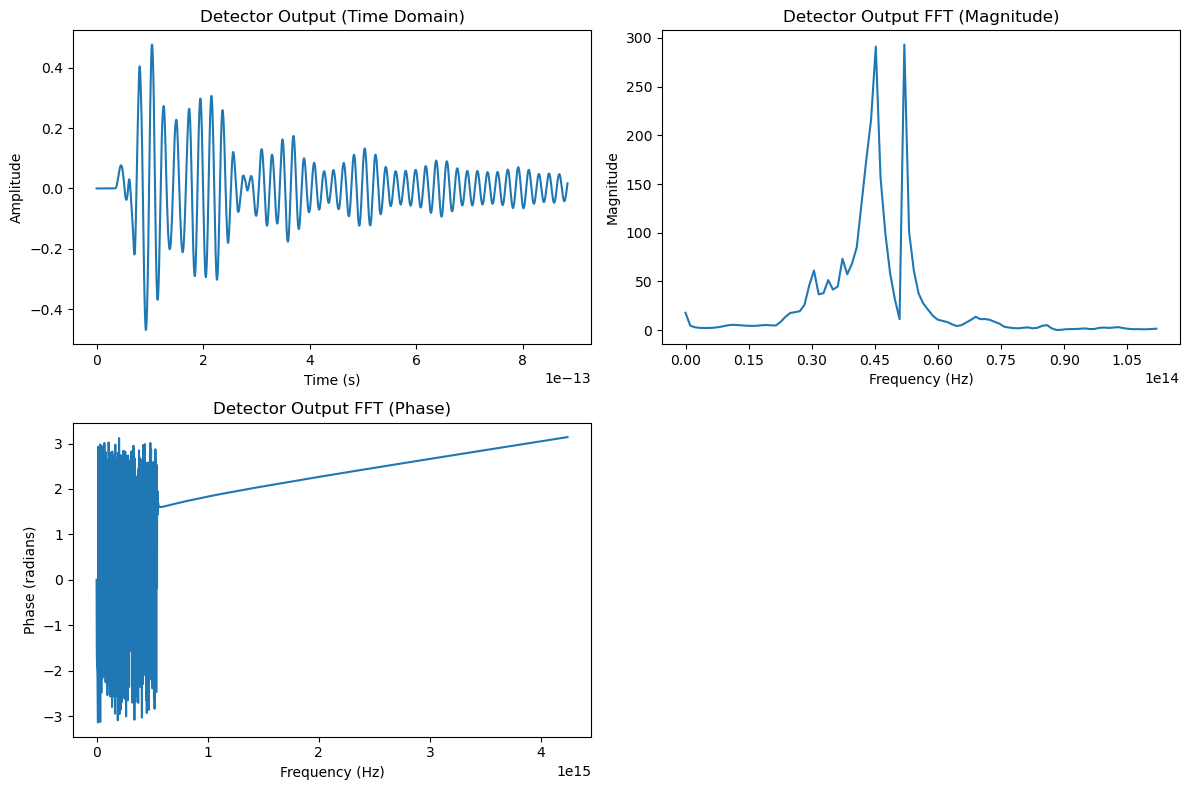

In [59]:
viz_detector(sim,point_detector5)